In [1]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA


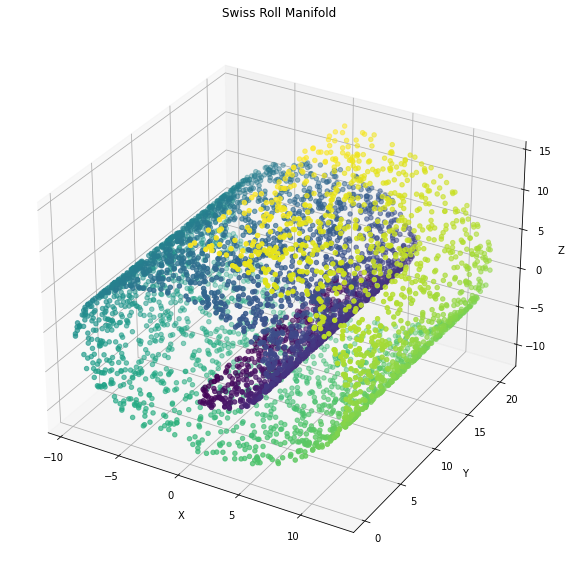

In [2]:
# generate data points on the swiss roll
n_samples = 5000
X, color = make_swiss_roll(n_samples, noise= 0, random_state=0)

# create scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Swiss Roll Manifold')

plt.show()


C:\Users\25058\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


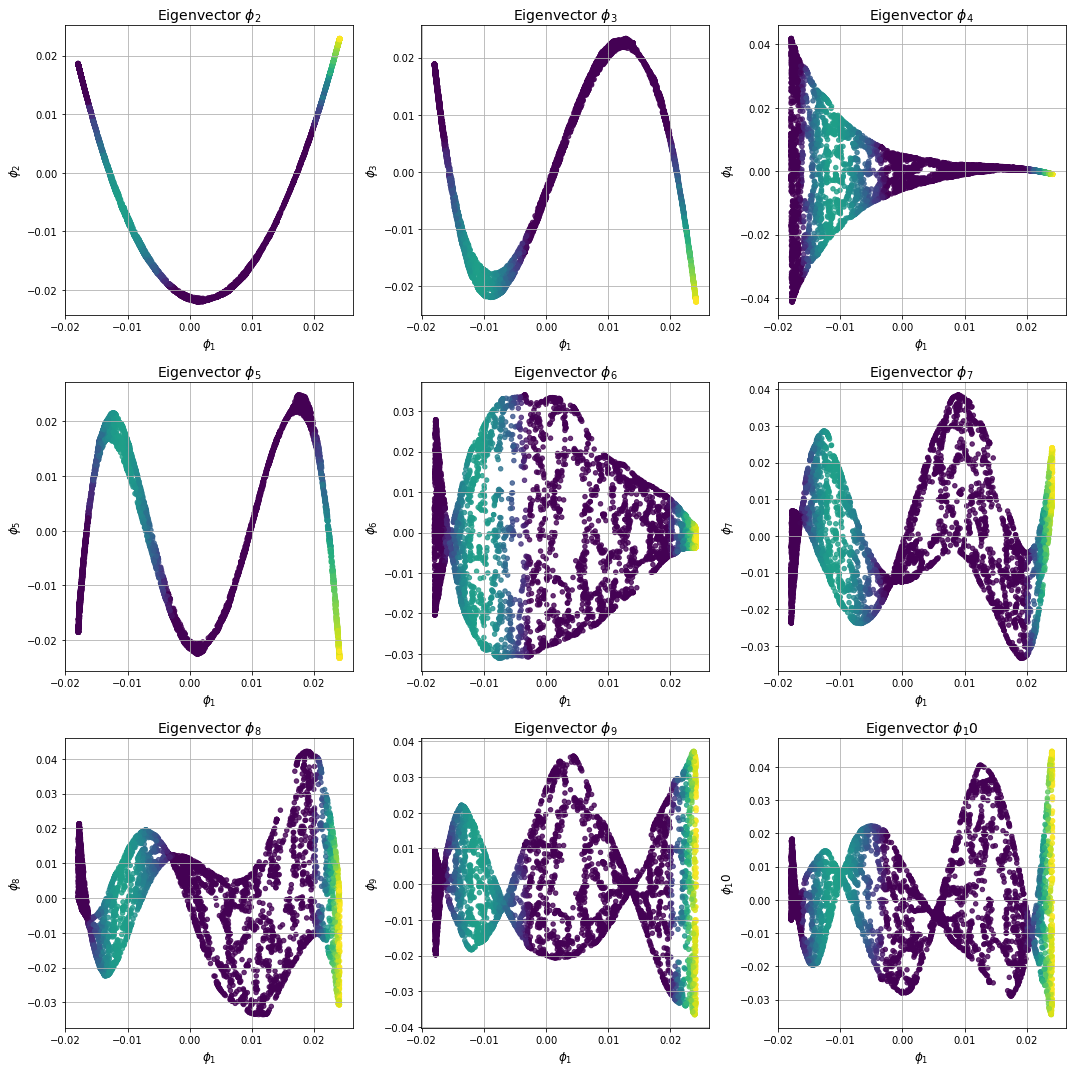

In [3]:
# calculate similarity matrix
n_neighbors = 10
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X)
distances, indices = knn.kneighbors(X)
similarity_matrix = np.zeros((len(X), len(X)))
for i, neighbors in enumerate(indices):
    similarity_matrix[i, neighbors] = 1

# calculate transition matrix
transition_matrix = similarity_matrix / np.sum(similarity_matrix, axis=1)[:, np.newaxis]

# perform embedding algorithm
embedding_dim = 10
embedding = SpectralEmbedding(n_components=embedding_dim, affinity='precomputed')
X_embedded = embedding.fit_transform(transition_matrix)

# plot the first non-constant eigenfunction on x-axis, the others on y-axis
cmap = get_cmap('viridis')
colors = cmap(X[:, 2] / np.max(X[:, 2]))

phi_1 = X_embedded[:, 0]
other_phis = X_embedded[:, 1:]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.scatter(phi_1, other_phis[:, i], c=colors, s=20, alpha=0.8)
    ax.set_xlabel('$\phi_1$', fontsize=12)
    ax.set_ylabel(f'$\phi_{i+2}$', fontsize=12)
    ax.set_title(f'Eigenvector $\phi_{i+2}$', fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [5]:
# perform PCA to compute the three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("Principal Components:")
for i in range(3):
    print(f"PC{i+1}: {pca.components_[i]}")

Principal Components:
PC1: [ 0.47417965 -0.01401482  0.88031656]
PC2: [-0.87493439 -0.11902486  0.46938566]
PC3: [-0.0982012   0.99279236  0.06870122]


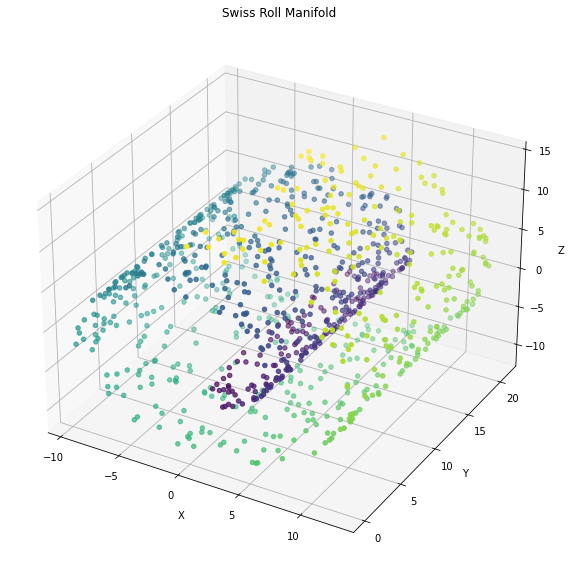

In [4]:
# generate 1000 data points this time
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise= 0, random_state=0)

# create scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Swiss Roll Manifold')

plt.show()

C:\Users\25058\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


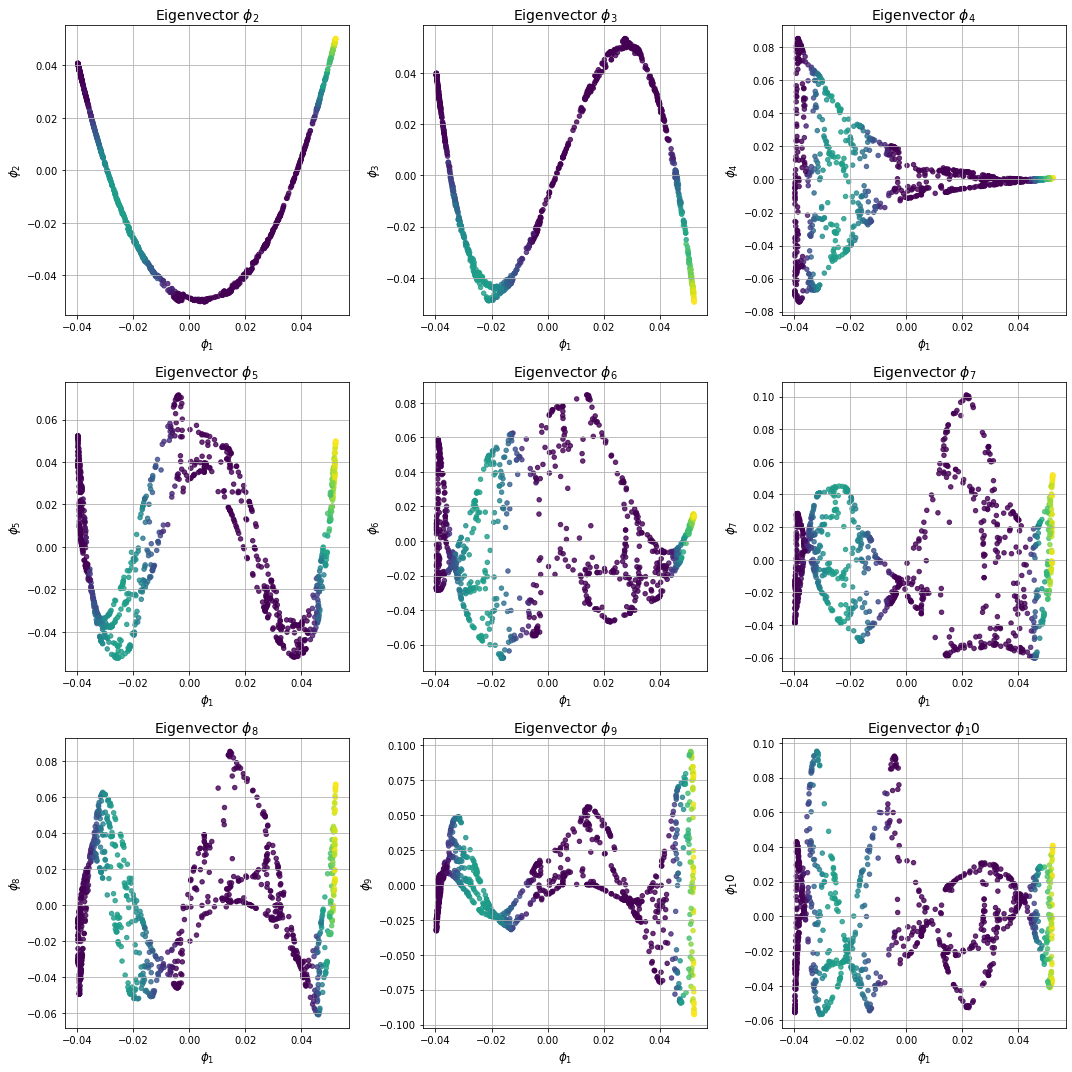

In [5]:
# calculate similarity matrix
n_neighbors = 10
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X)
distances, indices = knn.kneighbors(X)
similarity_matrix = np.zeros((len(X), len(X)))
for i, neighbors in enumerate(indices):
    similarity_matrix[i, neighbors] = 1

# calculate transition matrix
transition_matrix = similarity_matrix / np.sum(similarity_matrix, axis=1)[:, np.newaxis]

# perform embedding algorithm
embedding_dim = 10
embedding = SpectralEmbedding(n_components=embedding_dim, affinity='precomputed')
X_embedded = embedding.fit_transform(transition_matrix)

# plot the first non-constant eigenfunction on x-axis, the others on y-axis
cmap = get_cmap('viridis')
colors = cmap(X[:, 2] / np.max(X[:, 2]))

phi_1 = X_embedded[:, 0]
other_phis = X_embedded[:, 1:]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.scatter(phi_1, other_phis[:, i], c=colors, s=20, alpha=0.8)
    ax.set_xlabel('$\phi_1$', fontsize=12)
    ax.set_ylabel(f'$\phi_{i+2}$', fontsize=12)
    ax.set_title(f'Eigenvector $\phi_{i+2}$', fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()